In [2]:
!pip install kaggle

^C


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nanamulyanamaghfur","key":"11da37dbb74c981039e2be0329480536"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d larsen0966/student-performance-data-set

  0% 0.00/12.1k [00:00<?, ?B/s]
100% 12.1k/12.1k [00:00<00:00, 9.97MB/s]


In [6]:
!unzip student-performance-data-set.zip -d student_performance

Archive:  student-performance-data-set.zip
  inflating: student_performance/student-por.csv  


In [7]:
import pandas as pd

data = pd.read_csv("/content/student_performance/student-por.csv")

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [8]:
x = data[["studytime","paid","activities", "higher", "internet", "freetime", "health", "G1", "G2"]]
y = data["G3"]

In [9]:
categorical_columns = ['paid','activities','higher','internet']

for col in categorical_columns:
    col_ohe = pd.get_dummies(x[col], prefix=col)
    x = pd.concat((x, col_ohe), axis=1).drop(col, axis=1)

x.head()

,studytime,freetime,health,G1,G2,paid_no,paid_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes
0,2,3,3,0,11,1,0,1,0,0,1,1,0
1,2,3,3,9,11,1,0,1,0,0,1,0,1
2,2,3,3,12,13,1,0,1,0,0,1,0,1
3,3,2,5,14,14,1,0,0,1,0,1,0,1
4,2,3,5,11,13,1,0,1,0,0,1,1,0


In [10]:
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

scaled_columns = ["studytime", "freetime", "health"]

for col in scaled_columns:
  x[col] = NormalizeData(x[col])

x['G1'] = x['G1'] * 5 / 100
x['G2'] = x['G2'] * 5 / 100 

x.head()

,studytime,freetime,health,G1,G2,paid_no,paid_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes
0,0.333333,0.50,0.5,0.00,0.55,1,0,1,0,0,1,1,0
1,0.333333,0.50,0.5,0.45,0.55,1,0,1,0,0,1,0,1
2,0.333333,0.50,0.5,0.60,0.65,1,0,1,0,0,1,0,1
3,0.666667,0.25,1.0,0.70,0.70,1,0,0,1,0,1,0,1
4,0.333333,0.50,1.0,0.55,0.65,1,0,1,0,0,1,1,0


In [12]:
y = y * 5 / 100

y.head()

0    0.55
1    0.55
2    0.60
3    0.70
4    0.65
Name: G3, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [15]:
x_train.shape

(486, 13)

In [16]:
y_train.shape

(486,)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(13, input_shape=[13], activation="relu")) 
model.add(Dense(13, activation="relu")) 
model.add(Dense(13, activation="relu")) 
model.add(Dense(13, activation="relu"))
model.add(Dense(1))

In [34]:
model.compile(optimizer="adam", loss="mse")

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_11 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_12 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_13 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 14        
Total params: 742
Trainable params: 742
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(x= x_train, y= y_train, batch_size=32, epochs=500, validation_data=(x_test, y_test))

Epoch 1/500
16/16 [==============================] - 1s 15ms/step - loss: 0.1543 - val_loss: 0.0467
Epoch 2/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0317 - val_loss: 0.0291
Epoch 3/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0263 - val_loss: 0.0222
Epoch 4/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0227 - val_loss: 0.0191
Epoch 5/500
16/16 [==============================] - 0s 8ms/step - loss: 0.0206 - val_loss: 0.0180
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0196 - val_loss: 0.0170
Epoch 7/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.0161
Epoch 8/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0176 - val_loss: 0.0155
Epoch 9/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0167 - val_loss: 0.0146
Epoch 10/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0159 - val_loss: 0.0139
Epoch 11

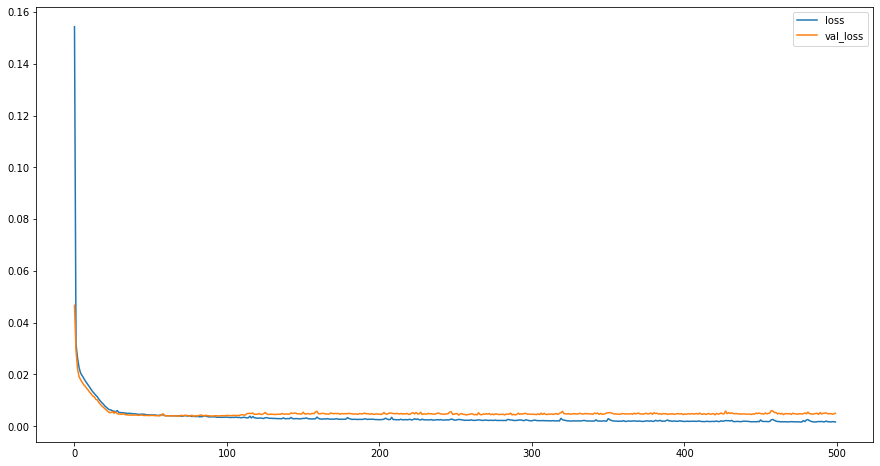

In [37]:
pd.DataFrame(history.history).plot(figsize=(15,8))

In [38]:
predictions = model.predict(x_test)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

print("The absolute mean error :",mean_absolute_error(y_test, predictions))
print("The squared mean error :",mean_squared_error(y_test, predictions))
print("The squared mean error :",np.sqrt(mean_squared_error(y_test, predictions)))
print("The Variance Score :", explained_variance_score(y_test, predictions))

The absolute mean error : 0.04860896354804009
The squared mean error : 0.004991777366253828
The squared mean error : 0.07065251139381974
The Variance Score : 0.8056029347720265


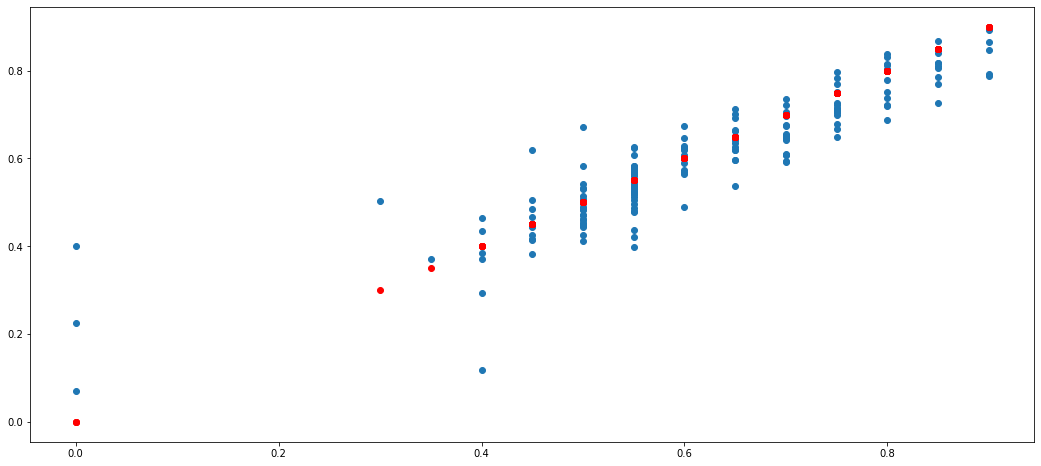

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
plt.scatter(y_test, predictions)
plt.scatter(y_test,y_test,color="red")

In [43]:
from sklearn.metrics import r2_score

sq = r2_score(y_test, predictions)
print('coefficient of determination:', sq)

coefficient of determination: 0.7973682502536241
